In [2]:
notebook_path = "Projects/QuantumFlow/notebooks"
try:
    import os
    from google.colab import drive
    drive.mount('/content/gdrive')
    os.chdir("/content/gdrive/My Drive/" + notebook_path)
except:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display

import sys
sys.path.append('../')

from quantumflow.calculus_utils import integrate, integrate_simpson, laplace
from quantumflow.colab_train_utils import load_hyperparameters, test_colab_devices, unpack_dataset

In [ ]:
data_dir = "../data"
experiment = 'recreate'
run_name = 'fine'
base_dir = os.path.join(data_dir, experiment)

if not os.path.exists(os.path.join(data_dir, experiment)): os.makedirs(os.path.join(data_dir, experiment))
file_hyperparams = os.path.join(data_dir, experiment, "hyperparams.config")

In [12]:
datadir = "../data"
dataset = "recreate"
dataset_fine_10 = "recreate/fine_10"

N = 1
    
with open(os.path.join(datadir, dataset, 'dataset_training.pkl'), 'rb') as f:
    np_x, np_potentials, np_wavefunctions, np_energies, np_densities, np_kenergies, M, G, h = unpack_dataset(N, pickle.load(f))
    
with open(os.path.join(datadir, dataset_fine_10, 'dataset_training.pkl'), 'rb') as f:
    np_x_fine, np_potentials_fine, np_wavefunctions_fine, np_energies_fine, np_densities_fine, np_kenergies_fine, M_fine, G_fine, h_fine = unpack_dataset(N, pickle.load(f))

print("Dataset:", dataset)
print("unpacked with N =", N)
print("dataset size M:", M)
print("discretiation points G:", G)

print("\nDataset Fine:", dataset_fine)
print("unpacked with N =", N)
print("dataset size M:", M_fine)
print("discretiation points G:", G_fine)


Dataset: recreate
unpacked with N = 1
dataset size M: 2000
discretiation points G: 500

Dataset Fine: recreate/fine_0.125
unpacked with N = 1
dataset size M: 2000
discretiation points G: 4991


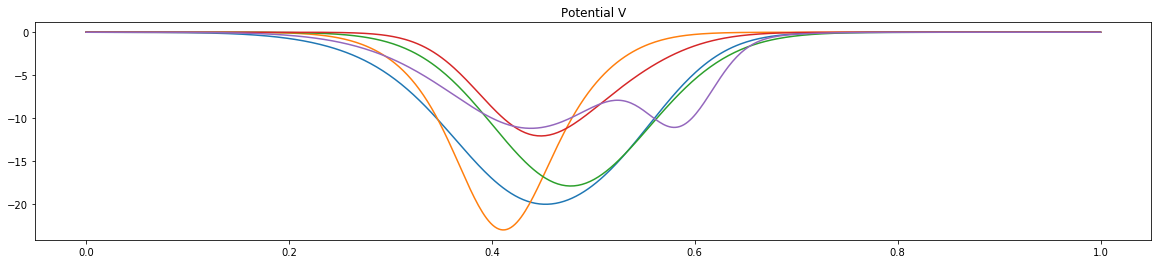

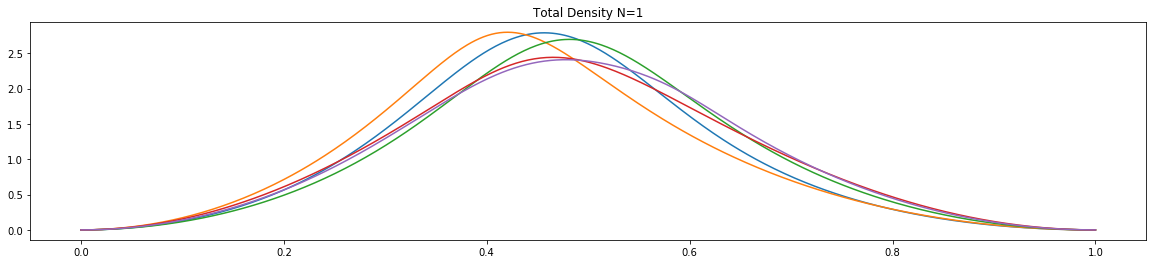

In [13]:
plt.figure(figsize=(20, 4))
plt.plot(np_x, np.transpose(np_potentials)[:, :5])
plt.title('Potential V')
plt.show()

plt.figure(figsize=(20, 4))
for i, np_plot in enumerate(np_densities[:5]):
    plt.plot(np_x, np_plot, 'C' + str(i%10))
plt.title('Total Density N=' + str(N))
plt.show()

In [14]:
print("discretisation coarse: G =", np_x.shape, np_x[0:2])
print("discretisation fine: G =", np_x_fine.shape, np_x_fine[0:11])
print("x discretization difference error: ", np.mean(np.abs(np_x_fine[0::10] - np_x)))

discretisation coarse: G = (500,) [0.         0.00200401]
discretisation fine: G = (4991,) [0.         0.0002004  0.0004008  0.0006012  0.0008016  0.001002
 0.0012024  0.00140281 0.00160321 0.00180361 0.00200401]
x discretization difference error:  1.4522113e-08


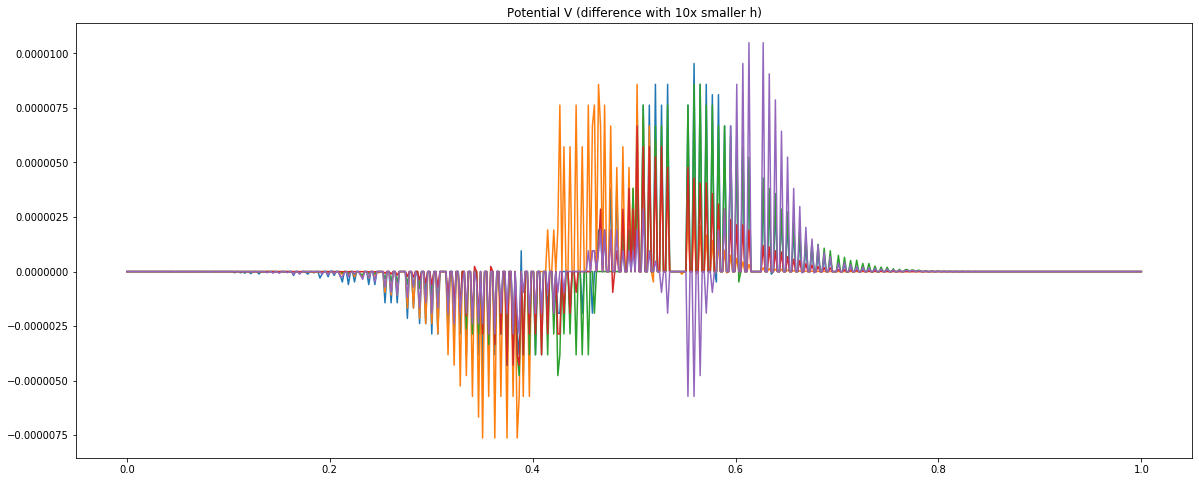

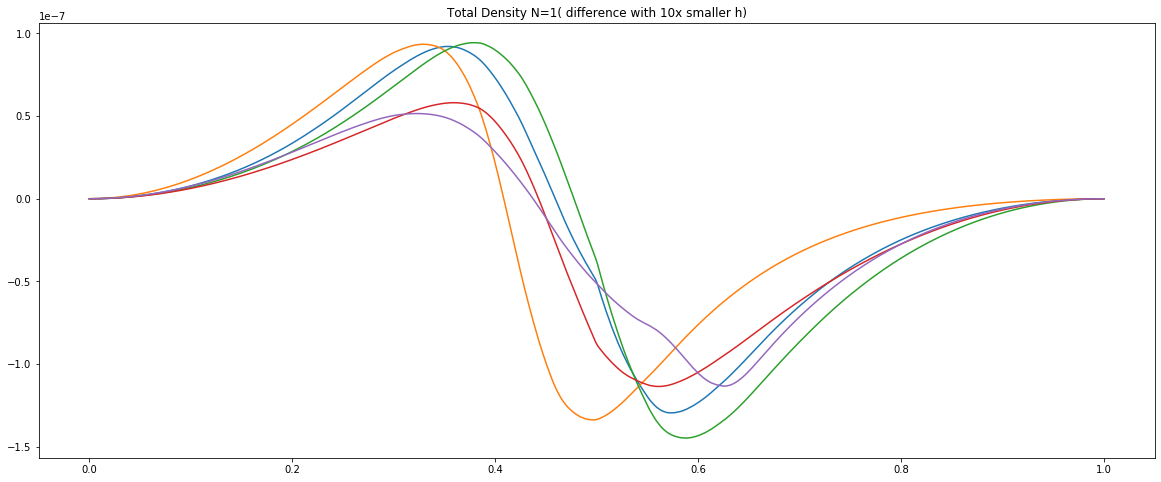

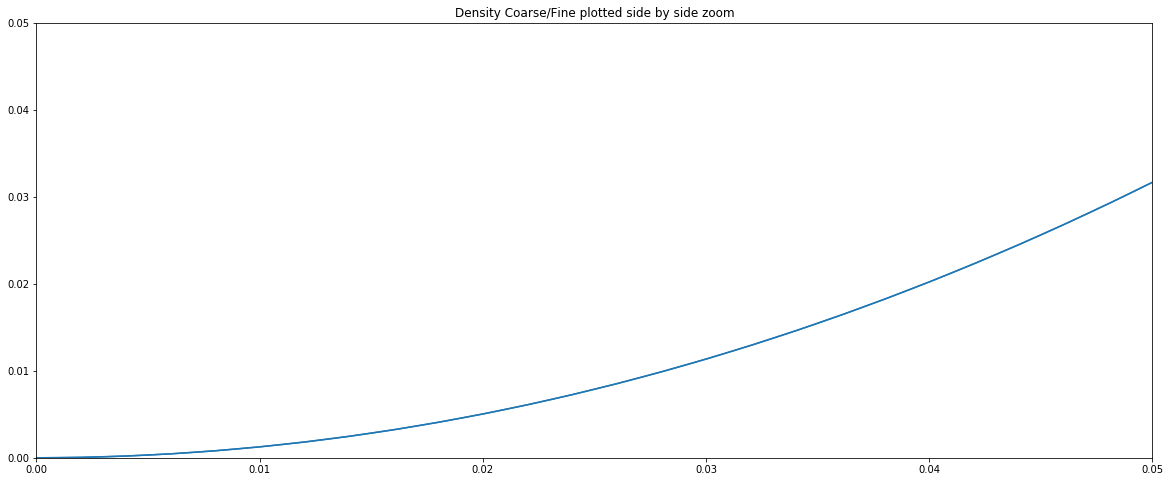

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(np_x, np.transpose(np_potentials - np_potentials_fine[:, 0::10])[:, :5])
plt.title('Potential V (difference with 10x smaller h)')
plt.show()

plt.figure(figsize=(20, 8))
for i, np_density_group in enumerate((np_densities  - np_densities_fine[:, 0::10])[:5]):
    plt.plot(np_x, np_density_group, 'C' + str(i%10))
plt.title('Total Density N=' + str(N) + '( difference with 10x smaller h)')
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(np_x, np_densities[0], 'C0')
plt.plot(np_x_fine, np_densities_fine[0], 'C0')
#np_kinetic_fine[:, 0::10, :]
plt.title('Density Coarse/Fine plotted side by side zoom')
plt.xlim([0.0, 0.05])
plt.ylim([0, 0.05])
plt.show()



Text(0.5, 1.0, 'Histogram of errors of T_j,N')

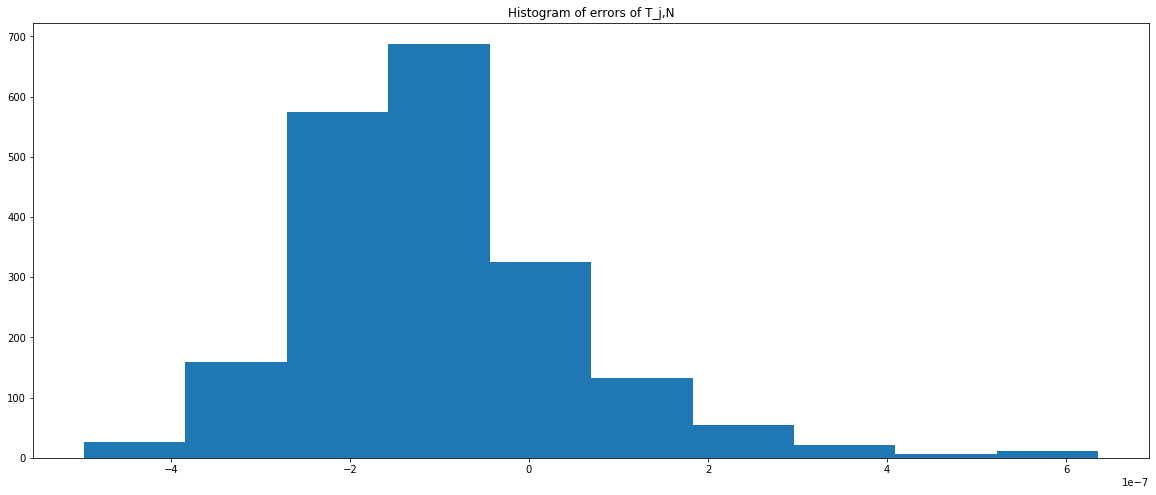

In [16]:
plt.figure(figsize=(20, 8))
plt.hist((np_kenergies - np_kenergies_fine).flatten())
plt.title('Histogram of errors of T_j,N')

In [24]:
print('min', np.min(np.abs(np_kenergies - np_kenergies_fine)), 'hartree')
print('mean', np.mean(np.abs(np_kenergies - np_kenergies_fine)), 'hartree')
print('max', np.max(np.abs(np_kenergies - np_kenergies_fine)), 'hartree')

kcalmol_per_hartree = 627.51

print()
print('min', np.min(np.abs(np_kenergies - np_kenergies_fine))*kcalmol_per_hartree, 'kcal/mol')
print('mean', np.mean(np.abs(np_kenergies - np_kenergies_fine))*kcalmol_per_hartree, 'kcal/mol')
print('max', np.max(np.abs(np_kenergies - np_kenergies_fine))*kcalmol_per_hartree, 'kcal/mol')

min 4.3095305102269776e-11 hartree
mean 1.5213393078949978e-07 hartree
max 6.359740272188219e-07 hartree

min 2.7042734904725308e-08 kcal/mol
mean 9.546556290971901e-05 kcal/mol
max 0.0003990800618200829 kcal/mol


In [18]:
print('min', np.min(np.abs(np_energies - np_energies_fine)))
print('mean', np.mean(np.abs(np_energies - np_energies_fine)))
print('max', np.max(np.abs(np_energies - np_energies_fine)))

min 0.0
mean 1.1881808e-07
max 1.5258789e-05


## Error of the kinetic energy in the range of 10^-6
## Error of the total energy is in the range of 10^-7
### Calculating the kinetic energy from the wavefunctions results in large errors